In [108]:
!pip install torchmetrics

     -------------------------------------- 983.2/983.2 kB 5.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torchmetrics

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop("Outcome", axis = 1)

In [5]:
y = df["Outcome"]

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [8]:
X_train_ten = torch.tensor(X_train.to_numpy(), dtype = torch.float32)
y_train_ten = torch.tensor(y_train.to_numpy(), dtype = torch.float32)
X_val_ten = torch.tensor(X_val.to_numpy(), dtype = torch.float32)
y_val_ten = torch.tensor(y_val.to_numpy(), dtype = torch.float32)
X_test_ten = torch.tensor(X_test.to_numpy(), dtype = torch.float32)
y_test_tan = torch.tensor(y_test.to_numpy(), dtype = torch.float32)

In [9]:
train_data = TensorDataset(X_train_ten,y_train_ten)
test_data = TensorDataset(X_test_ten,y_test_tan)
val_data = TensorDataset(X_val_ten,y_val_ten)

In [10]:
train_loader = DataLoader(train_data, batch_size=4,shuffle = False) # want to test on same
test_loader = DataLoader(test_data, batch_size=4,shuffle = False)
val_loader = DataLoader(val_data, batch_size=4,shuffle = False)

In [11]:
mean_train_loss= list()
mean_eval_loss = list()
mean_test_loss  = list()

In [12]:
train_accuracy = list()
test_accuracy = list()
eval_accuracy = list()

In [13]:
model = nn.Sequential(
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,1)
)

In [14]:
loss_object = nn.BCEWithLogitsLoss()

In [15]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [16]:
metric = torchmetrics.Accuracy(task="binary")

In [49]:
# one epoch
train_losss = 0.0
for features, labels in train_loader:
    optimizer.zero_grad()
    y_pred = model(features)
    loss = loss_object(y_pred,labels.reshape(-1,1))
    train_losss = train_losss + loss.item() # Summing loss of each batch  = total loss of one epcoh
    metric.update(y_pred, labels.int().reshape(-1,1)) #.int() converts a tensor to integer type (torch.int32)
    loss.backward()
    optimizer.step()
mean_loss = train_losss/len(train_loader)
score = metric.compute()
print(mean_loss)
mean_train_loss.append(mean_loss)
train_accuracy.append(score)
metric.reset()

0.633261764270288


In [50]:
model.eval() #Set the module in evaluation mode.
eval_loss = 0.0
with torch.no_grad() : # disable gradients
 for features,labels in val_loader:
     y_pred = model(features)
     loss = loss_object(y_pred,labels.reshape(-1,1))
     eval_loss = eval_loss + loss.item()
     metric.update(y_pred, labels.int().reshape(-1,1))
mean_loss = eval_loss/len(val_loader)
print(mean_loss)
mean_eval_loss.append(mean_loss)
score = metric.compute()
eval_accuracy.append(score)
metric.reset()

0.6794709511871996


In [51]:
model.train() # Switch back to tarining mode

Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [52]:
test_loss = 0.0
for features, labels in test_loader:
    y_pred = model(features)
    loss = loss_object(y_pred,labels.reshape(-1,1))
    test_loss = test_loss + loss.item()
    metric.update(y_pred, labels.int().reshape(-1,1))
mean_loss = test_loss/len(test_loader)
score = metric.compute()
test_accuracy.append(score)
metric.reset()
mean_test_loss.append(mean_loss)

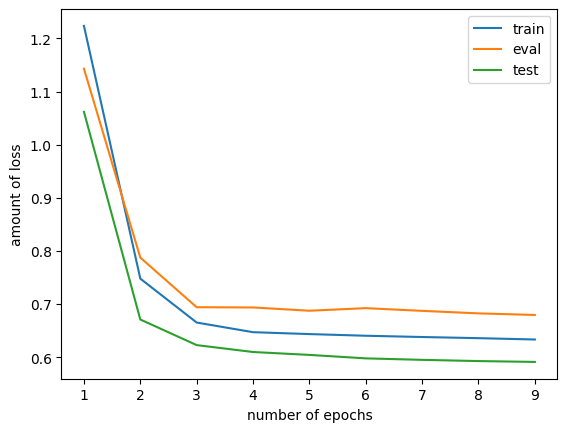

In [55]:
l = list(range(1,len(mean_train_loss)+1))
plt.plot(l,mean_train_loss,label = "train")
plt.plot(l,mean_eval_loss,label = "eval")
plt.plot(l,mean_test_loss,label= "test")
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("amount of loss")
plt.show()

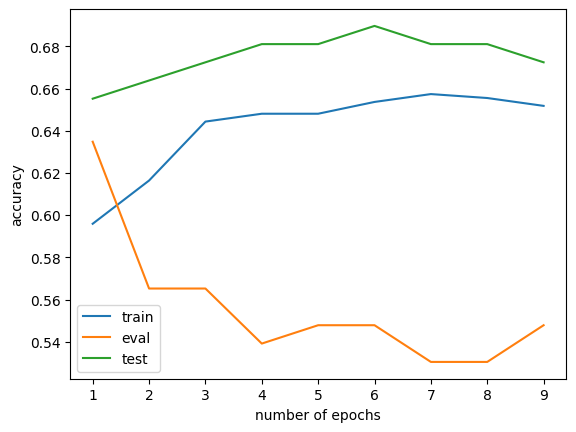

In [54]:
l = list(range(1,len(mean_train_loss)+1))
plt.plot(l,train_accuracy,label = "train")
plt.plot(l,eval_accuracy,label = "eval")
plt.plot(l,test_accuracy,label= "test")
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.show()